In [1]:
import pandas as pd
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=sb.load_dataset("iris")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
x=df.iloc[:,0:4]
y=df.iloc[:,4:]
y

,species
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa
...,...
145,virginica
146,virginica
147,virginica
148,virginica


In [6]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y=le.fit_transform(y)
y

c:\users\runnu\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [7]:
from sklearn.model_selection import train_test_split as tts
x_train,x_test,y_train,y_test=tts(x,y,test_size=0.2,random_state=3)

In [8]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(criterion='entropy')
dt.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [9]:
h=dt.predict(x_test)
print(y_test,'\n',h)

[0 0 0 0 0 2 1 0 2 1 1 0 1 1 2 0 1 2 2 0 2 2 2 1 0 2 2 1 1 1] 
 [0 0 0 0 0 2 1 0 2 1 1 0 1 1 2 0 1 2 2 0 2 2 2 1 0 2 2 1 1 1]


In [10]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,h)
cm

array([[10,  0,  0],
       [ 0, 10,  0],
       [ 0,  0, 10]], dtype=int64)

In [11]:
k=accuracy_score(y_test,h)
k

1.0

[Text(390.6, 697.62, 'X[3] <= 0.8\nentropy = 1.585\nsamples = 120\nvalue = [40, 40, 40]'),
 Text(330.50769230769237, 570.78, 'entropy = 0.0\nsamples = 40\nvalue = [40, 0, 0]'),
 Text(450.69230769230774, 570.78, 'X[3] <= 1.75\nentropy = 1.0\nsamples = 80\nvalue = [0, 40, 40]'),
 Text(240.3692307692308, 443.94, 'X[2] <= 4.95\nentropy = 0.446\nsamples = 43\nvalue = [0, 39, 4]'),
 Text(120.1846153846154, 317.1, 'X[0] <= 4.95\nentropy = 0.176\nsamples = 38\nvalue = [0, 37, 1]'),
 Text(60.0923076923077, 190.26, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(180.27692307692308, 190.26, 'entropy = 0.0\nsamples = 37\nvalue = [0, 37, 0]'),
 Text(360.55384615384617, 317.1, 'X[3] <= 1.55\nentropy = 0.971\nsamples = 5\nvalue = [0, 2, 3]'),
 Text(300.4615384615385, 190.26, 'entropy = 0.0\nsamples = 2\nvalue = [0, 0, 2]'),
 Text(420.6461538461539, 190.26, 'X[2] <= 5.45\nentropy = 0.918\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(360.55384615384617, 63.42000000000007, 'entropy = 0.0\nsamples = 2

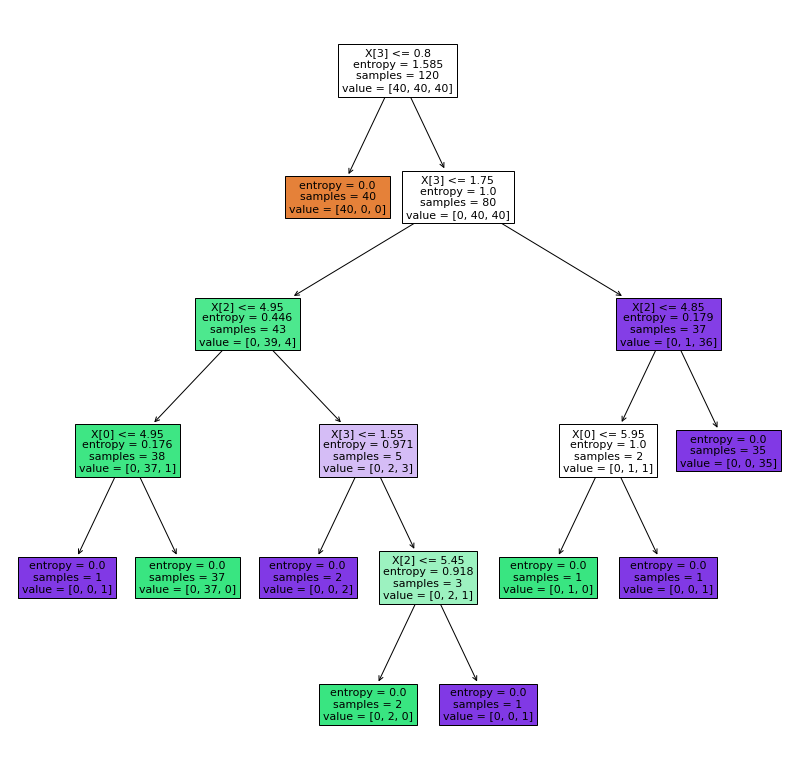

In [20]:
from sklearn.tree import plot_tree
plt.figure(figsize=(14,14))
plot_tree(dt,filled=True,fontsize=11)